#### Panagiotis Kafantaris Half Course Assignment

# Triangular and One-way Arbitrage

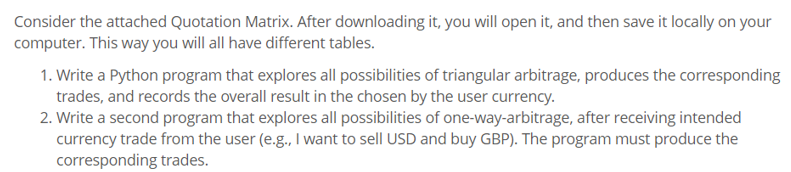

#### Load Dataset

We load the data from Quotation Matrix.xlsx. This file must always be in the same location as the .ipynb file.

In [1]:
import pandas as pd

file_path = 'Quotation Matrix.xlsx'
quotation_matrix = pd.read_excel(file_path, index_col=0)

quotation_matrix

,USD,EUR,JPY,GBP,CHF,CAD,AUD
AUD,1.2440,1.744100,0.011500,2.182900,1.095900,1.163400,NaN
CAD,1.0693,1.499200,0.009900,1.876300,0.942000,NaN,0.858948
CHF,1.1352,1.591500,0.010500,1.992000,NaN,1.060511,0.911216
GBP,0.5699,0.799000,0.005300,NaN,0.501707,0.532325,0.457969
JPY,107.8600,151.220000,NaN,188.396650,95.133448,100.919274,86.939134
EUR,0.7133,NaN,0.006604,1.250564,0.627648,0.666356,0.573247
USD,NaN,1.399975,0.009267,1.752416,0.880550,0.934630,0.802735


#### What we see:

The DataFrame's columns represent various currencies and provides the exchange rates of the base currencies to the target currencies.

#### Triangular Arbitrage

The process:

- We make sure we have 3 different currencies. The one is always our base currency which we set in the beginning.
- Based on the matrix we extract their rates (e.g USD/JPY = 107.8600, means that for 1 dollar we get 107 yen).
- We take their product and if is greater than 1 then that means we have an arbitrage since we started with 1 dollar in our example. Of course we can change the base currency but always be 1 of a specified currency set by the user.

In [2]:
import numpy as np

def triangular_arbitrage(matrix, base_currency):
    currencies = matrix.columns
    results = []
    
    for j in currencies:
        if base_currency != j:
            for k in currencies:
                if k != base_currency and k != j:
                    try:
                        # Extract exchange rates
                        rate_ij = matrix.at[j, base_currency]
                        rate_jk = matrix.at[k, j]
                        rate_ki = matrix.at[base_currency, k] # back to base currency
                        arbitrage_rate = rate_ij * rate_jk * rate_ki
                        
                        # If arbitrage rate is greater than 1, it's a profitable trade
                        # this is because we started we 1 dollar
                        if arbitrage_rate > 1:
                            profit = (arbitrage_rate - 1) * 100 
                            results.append({
                                    'Base Currency': base_currency,
                                    'Intermediate Currency 1': j,
                                    'Intermediate Currency 2': k,
                                    'Arbitrage Rate': arbitrage_rate,
                                    'Profit (%)': profit
                                })
                    except KeyError:
                        continue
    return results

#### Run program and print results

In [3]:
def main():
    base_currency = 'USD'  # Example base currency, We ca set any currency that we want
    
    results = triangular_arbitrage(quotation_matrix, base_currency)
    for result in results:
        print(f"Base Currency: {result['Base Currency']}, ->: {result['Intermediate Currency 1']}, ->: {result['Intermediate Currency 2']}, ->: {result['Base Currency']}")
        print(f"Arbitrage Rate: {result['Arbitrage Rate']:.6f}, Profit: {result['Profit (%)']:.2f}%")
        print("---------------------------------------------------")

if __name__ == "__main__":
    main()

Base Currency: USD, ->: JPY, ->: GBP, ->: USD
Arbitrage Rate: 1.001782, Profit: 0.18%
---------------------------------------------------
Base Currency: USD, ->: CHF, ->: JPY, ->: USD
Arbitrage Rate: 1.000756, Profit: 0.08%
---------------------------------------------------
Base Currency: USD, ->: AUD, ->: JPY, ->: USD
Arbitrage Rate: 1.002209, Profit: 0.22%
---------------------------------------------------


#### Explanation of Triangular Arbitrage Results

The triangular arbitrage results demonstrate profitable opportunities by leveraging differences in exchange rates among three currencies. The profit percentages (0.18%, 0.08%, and 0.22%) indicate the effectiveness of this strategy in generating returns, with the USD -> AUD -> JPY -> USD route being the most profitable in this set of examples.

#### One way arbitrage

The process:

- We make sure we have 3 different currencies. The first two are always what we have set as Sell and Buy currencies.
- Based on the matrix we extract their rates (e.g USD/JPY = 107.8600, means that for 1 dollar we get 107 yen).
- We take the product of sell/intermidiate rate and intermidiate/buy rates and if is greater than direct purchase rate (sell/buy) then that means we have an arbitrage. The profit is always based on the Conversion Purchace / Direct Purchase.

In [4]:
def one_way_arbitrage(matrix, start_currency, end_currency):
    possible_routes = []
    for intermediate_currency in matrix.columns:
        if intermediate_currency == start_currency or intermediate_currency == end_currency:
            continue
        
        try:
            # Extract exchange rates
            rate_s_m = matrix.at[intermediate_currency, start_currency]
            rate_m_e = matrix.at[end_currency, intermediate_currency] # back to base currency
            rate_s_e = matrix.at[end_currency, start_currency] # direct purchase
            arbitrage_rate = rate_s_m * rate_m_e
            if arbitrage_rate > rate_s_e:
                profit = ((arbitrage_rate/rate_s_e) - 1) * 100 
                possible_routes.append({
                        'Sell Currency': start_currency,
                        'Intermediate Currency 1': intermediate_currency,
                        'Buy Currency': end_currency,
                        'Direct Rate': rate_s_e,
                        'Arbitrage Rate': arbitrage_rate,
                        'Profit (%)': profit
                    })
        except Exception as e:
            pass
    
    return possible_routes

#### Run program and print results

In [5]:
import pandas as pd

def main():
    # User input
    sell = 'USD' # what we want to sell
    buy = 'GBP'  # what we want to buy
    
    # Find all possible one-way arbitrage routes
    routes = one_way_arbitrage(quotation_matrix, sell, buy)
    for result in routes:
        print(f"Direct Purchase: {result['Sell Currency']}, ->: {result['Buy Currency']}")
        print(f"Direct Rate: {result['Direct Rate']:.6f}")
        print(f"Conversion Purchase: {result['Sell Currency']}, ->: {result['Intermediate Currency 1']}, ->: {result['Buy Currency']}")
        print(f"Arbitrage Rate: {result['Arbitrage Rate']:.6f}, Profit: {result['Profit (%)']:.2f}%")
        print("---------------------------------------------------")

if __name__ == "__main__":
    main()


Direct Purchase: USD, ->: GBP
Direct Rate: 0.569900
Conversion Purchase: USD, ->: EUR, ->: GBP
Arbitrage Rate: 0.569927, Profit: 0.00%
---------------------------------------------------
Direct Purchase: USD, ->: GBP
Direct Rate: 0.569900
Conversion Purchase: USD, ->: JPY, ->: GBP
Arbitrage Rate: 0.571658, Profit: 0.31%
---------------------------------------------------


#### Explanation of One-Way Arbitrage Results

The one-way arbitrage strategy shows that converting USD to GBP via JPY is more profitable than direct conversion or conversion via EUR. The profit percentage is calculated by comparing the arbitrage rate to the direct rate. The conversion via JPY provides a slight profit, demonstrating the potential for one-way arbitrage to exploit minor discrepancies in exchange rates for financial gain.

#### Difference Between One-Way and Triangular Arbitrage Results

Both arbitrage strategies aim to exploit currency price discrepancies for profit. One-way arbitrage is simpler but typically less profitable, while triangular arbitrage, though more complex, can offer higher returns.